
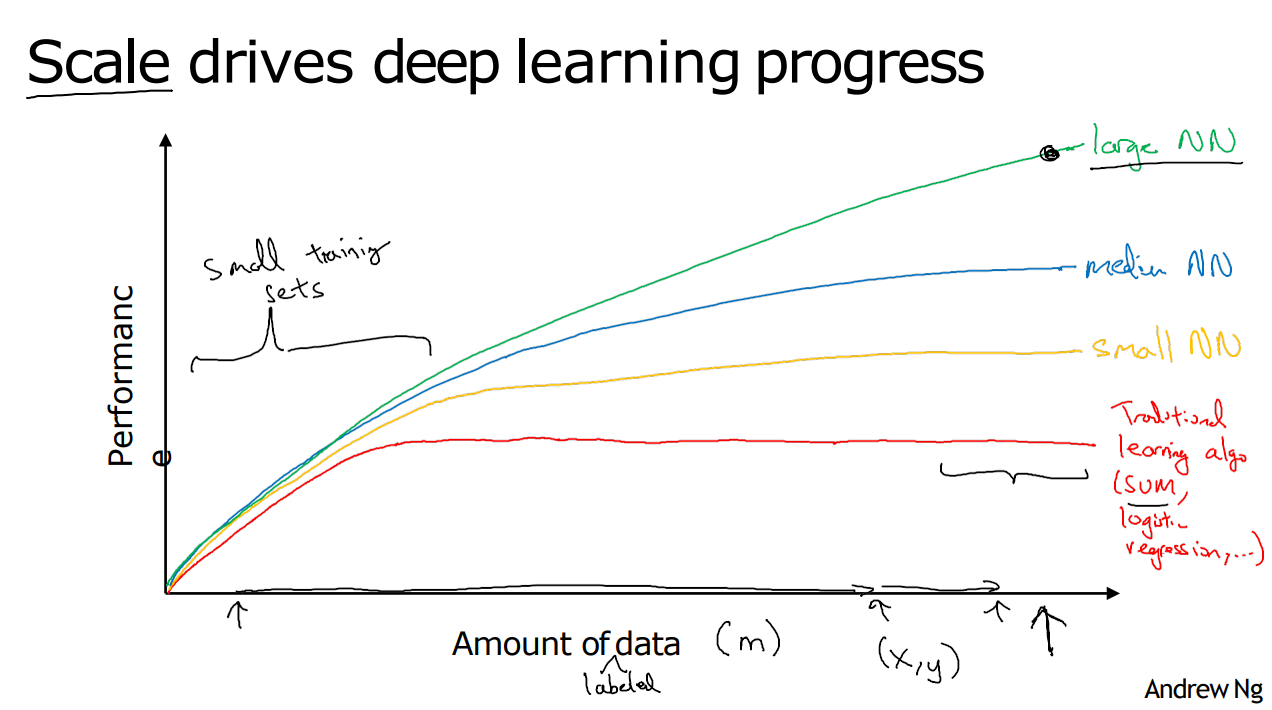

- **RNNs** are particularly effective in handling sequential data, such as text, speech, and time series data. The key feature of RNNs is their ability to capture dependencies and patterns in sequential information through recurrent connections. This makes them well-suited for tasks involving sequence modeling, language translation, sentiment analysis, and speech recognition, where the order of the data is crucial.


- **CNNs** are primarily designed for processing grid-like data, such as images or two-dimensional data. CNNs utilize convolutional layers to automatically learn and extract meaningful features from local patterns in the input data. They excel at tasks like image classification, object detection, and image generation due to their ability to capture spatial hierarchies and invariant features.

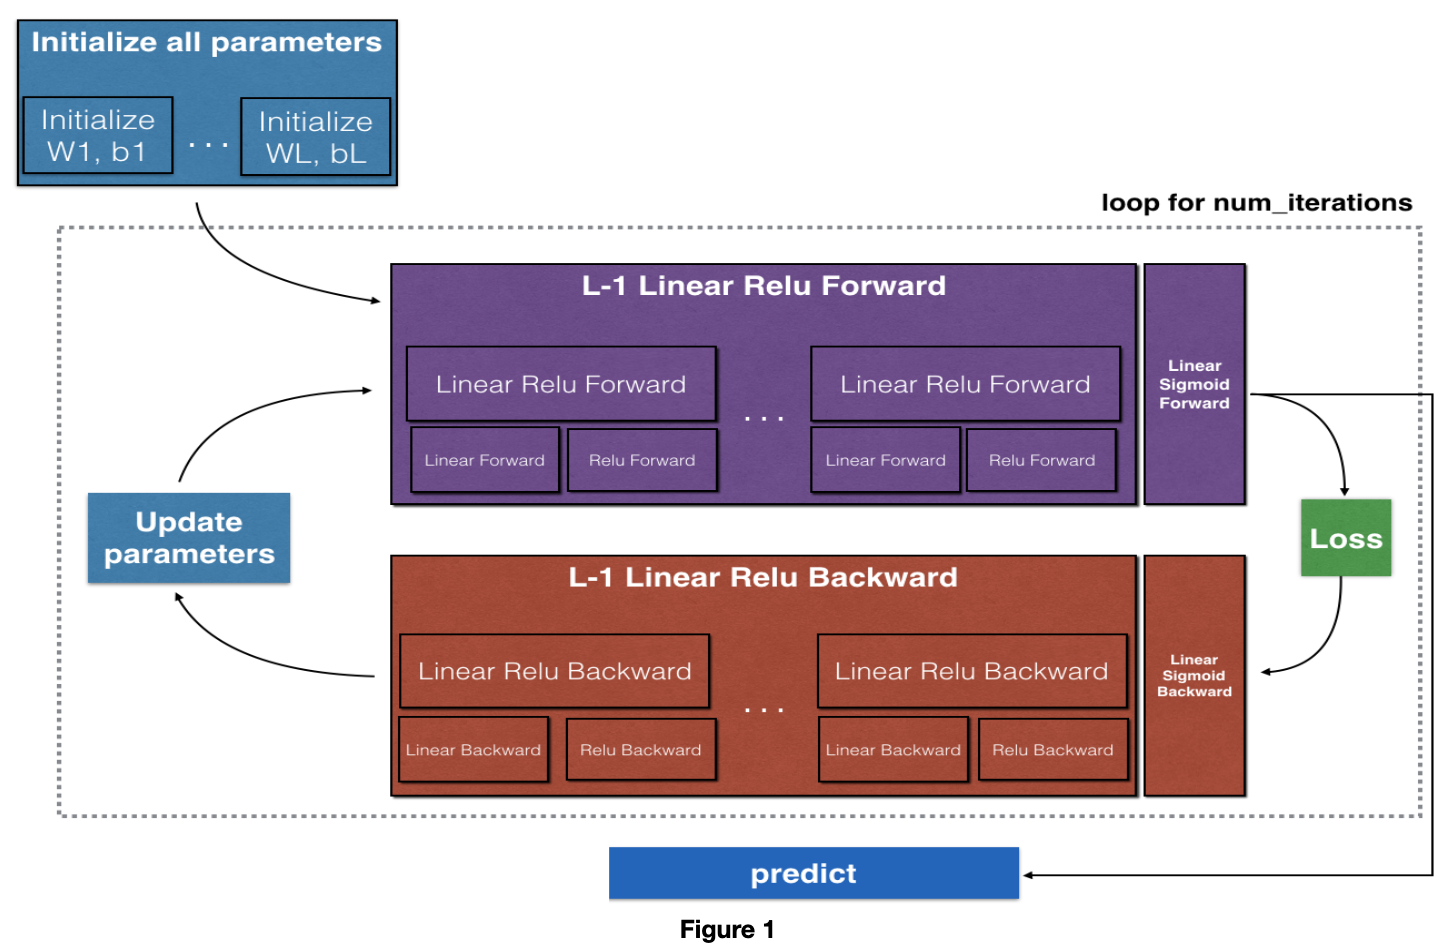

**Note**:

For every forward function, there is a corresponding backward function. This is why at every step of your forward module you will be storing some values in a cache. These cached values are useful for computing gradients. 


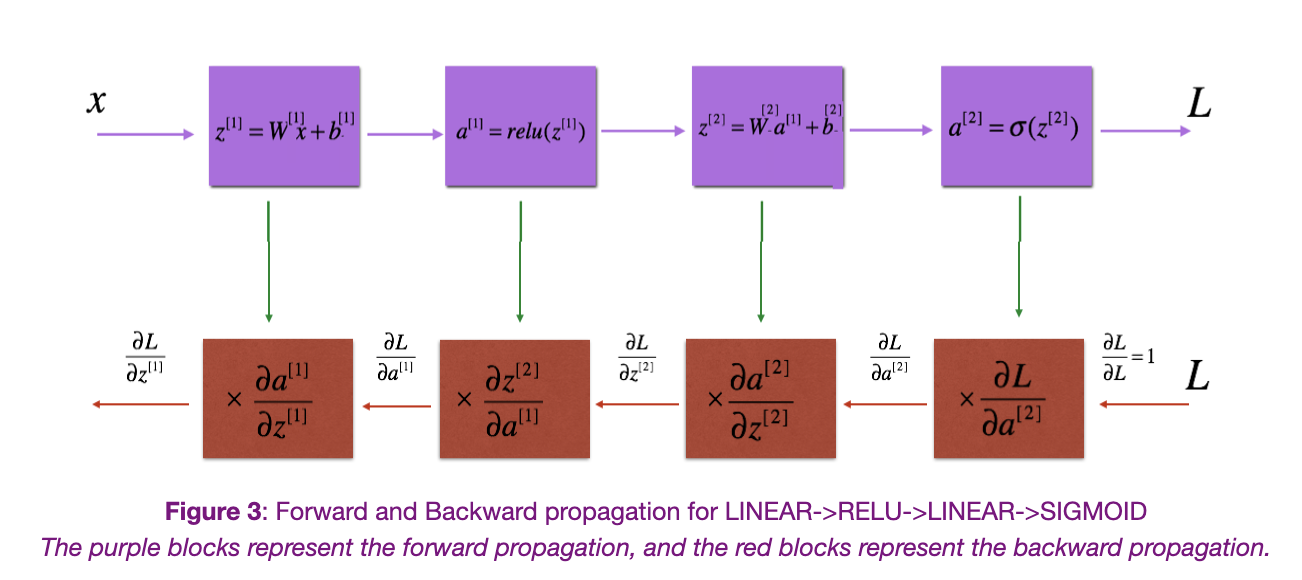

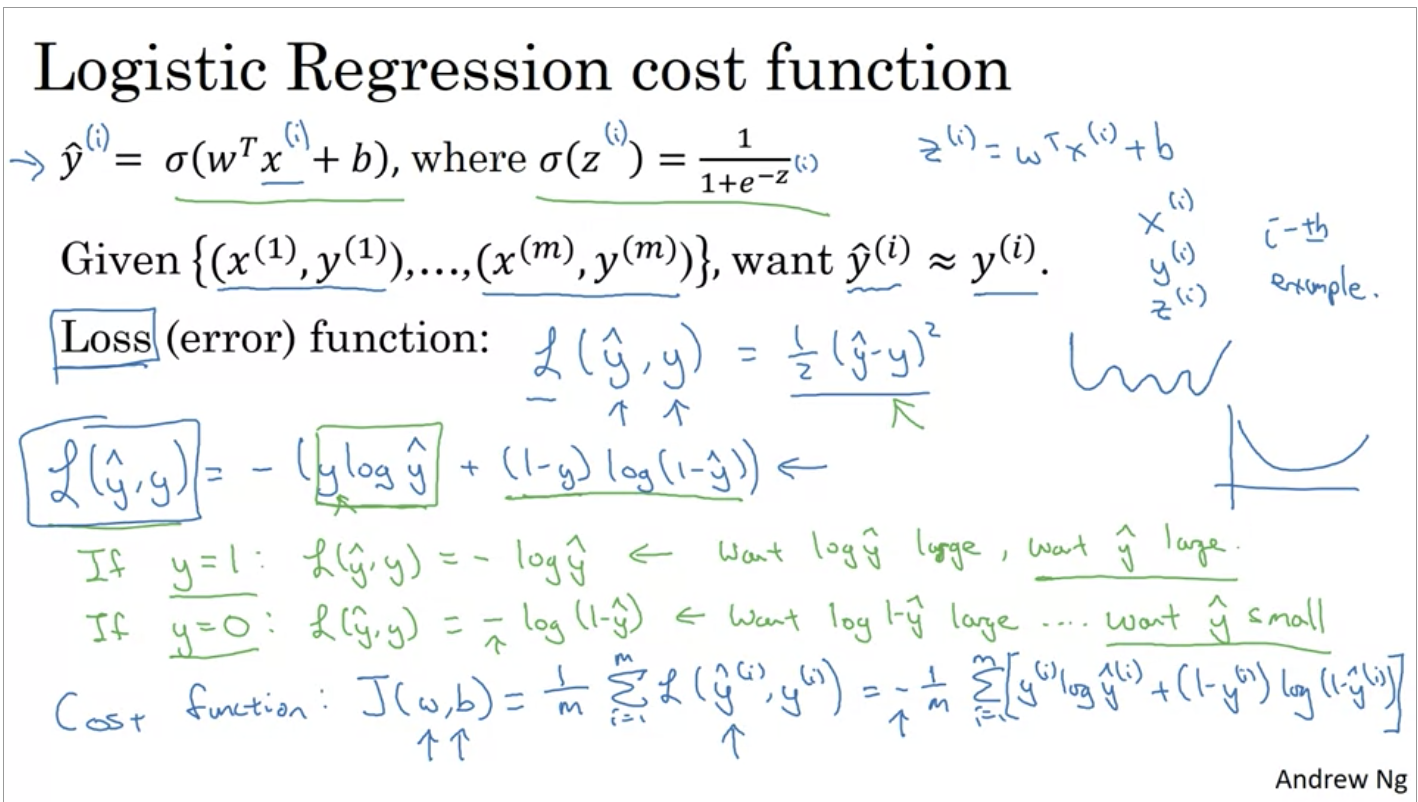
- Logistic regression
    - the square error function makes gradient descent not work well (it gives a non-convex solution - local minima) so we use a different loss function that gives a convex solution 

- Forward propagation (forward pass): computes the output
- Backward propagation (ackward pass): computes gradients/ derivatives
- A neuron computes the linearity ($W_x +b$) and then the activation function (sigmoid, tanh, ReLU)
    - In logistic regression we use a linear function $W_x + b$ followed by the sigmoid function $\sigma$, to get an output $y$, referred to as $\hat{y}$, such that 0<$\hat{y}<1$
- Feature column vectors: you stack all elements for a single item into a column

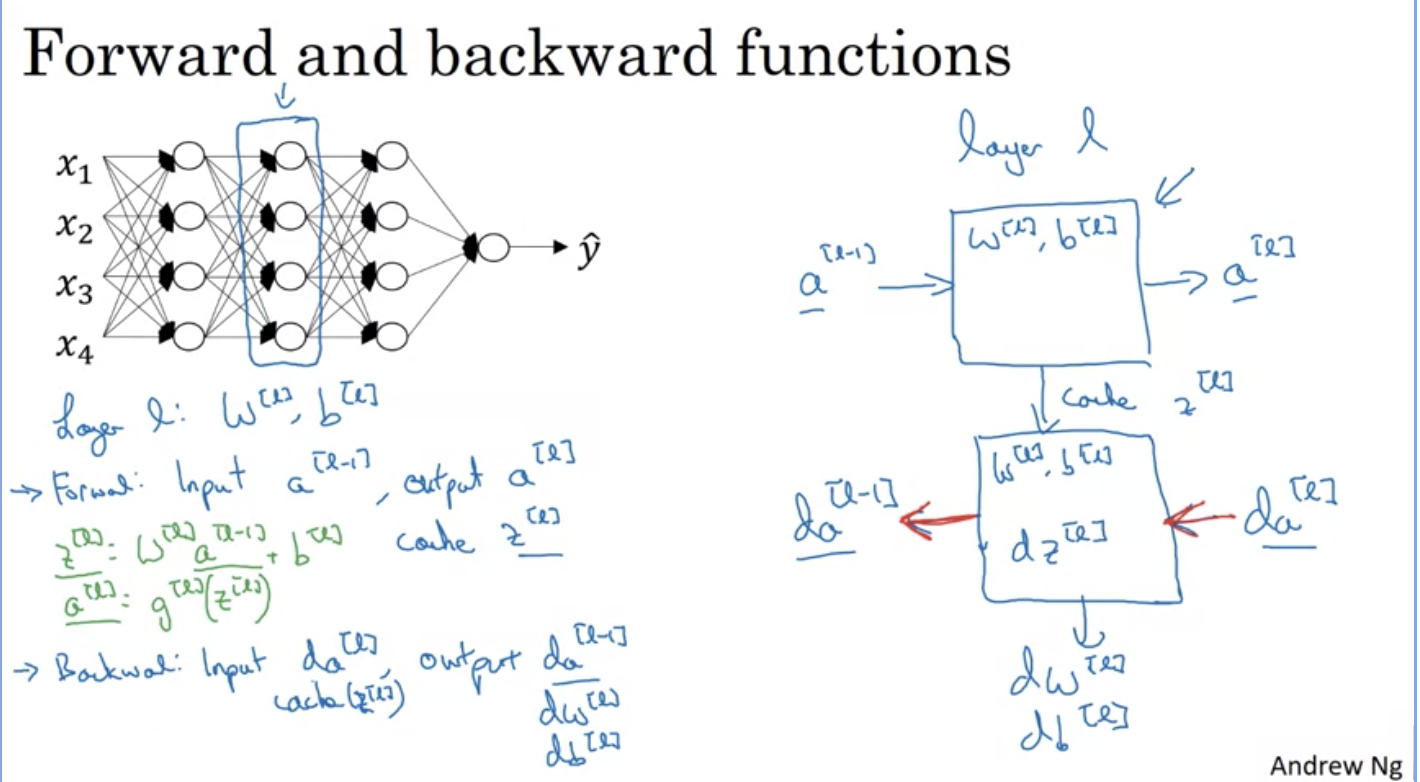

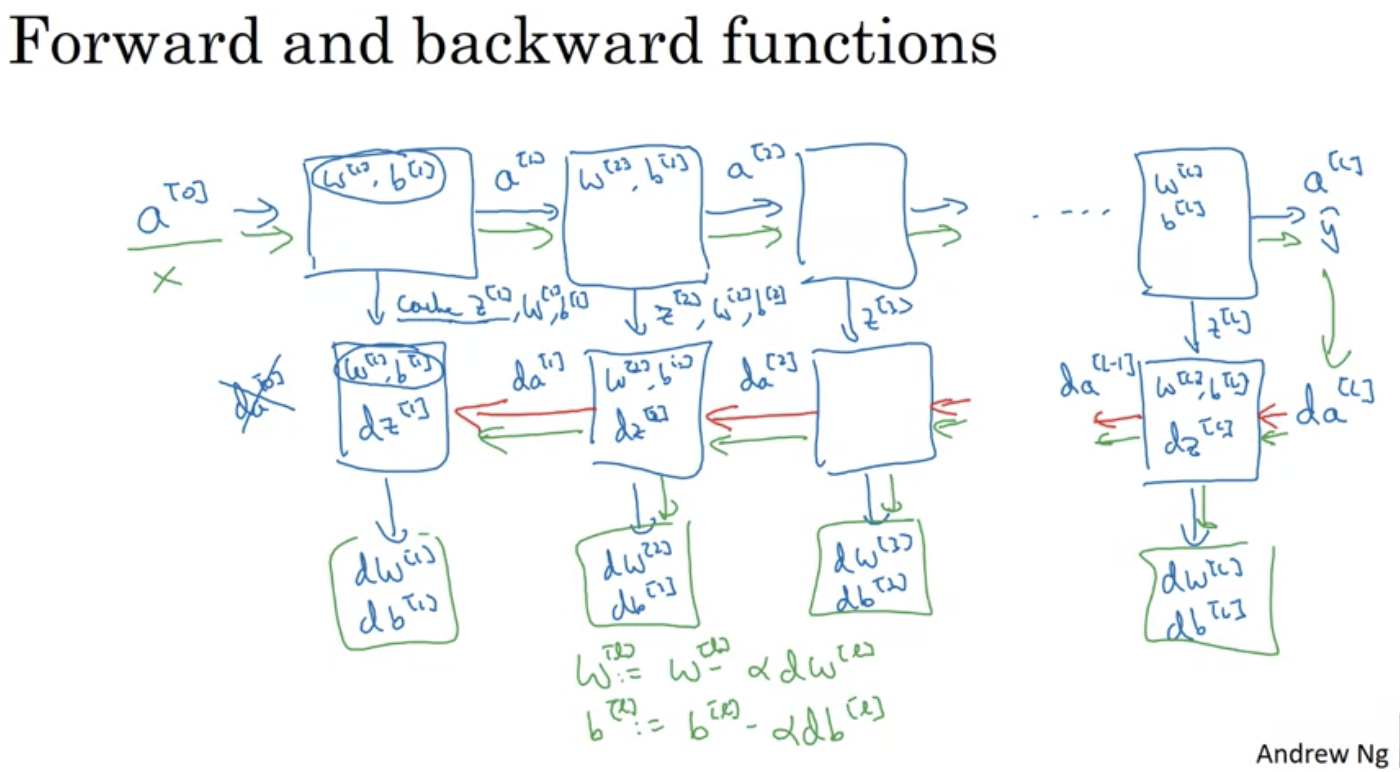

sigmoid function $\sigma(z)=\frac{1}{1+\exp(-z)}$ and its derivative $\sigma'(z)=\sigma(z)(1-\sigma(z))$

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

<font color='blue'>
    
    
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data
</font>

<a name='4'></a>
### Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

**Logistic regression**

Forward Propagation:
- You get X (each column is one training example)
- $W^{[l]}=(n^{[l]}, n^{[l-1]})$ where n=#neuron (logistic regression has only one layer)
- non-vectorized $b^{[l]}=(n^{[l]},1)$
- vectorized $b^{[L]}=(n^{[L]},m)$
- non-vectorized $z^{[1]} = (n^{[1]},1)$
- vectorized $Z^{[L]} = (n^{[L]},m)$
- non-vectorize $x=(n^{[0]},1)$
- vectorize $X=(n^{[0]},m)$
- $A^{[L]}=(n^{[L]},m)$ when $L\ne0$

- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

W1 -- weight matrix of shape (n_h, n_x)
b1 -- bias vector of shape (n_h, 1)
W2 -- weight matrix of shape (n_y, n_h)
b2 -- bias vector of shape (n_y, 1)

Here are the two formulas you will be using (backward propagation): 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

- Forward and backward functions
layer l: $W^{[l]}, b^{[l]}$
forward: input $a^{[l-1]}$ output $a^{[l]}$, $z^{[l]}=w^{[l]}*a^{[l-a]}+b^{[l]}$, $a^{[l]}=g^{[l]}(z^{[l]})$, cache $z^{[l]}$

backward: input $da^{[l]}$, output $da^{[l-1]}$, $dW^{[l]}$, $db^{[l]}$, cache $(z^{[l]})$

non-vectorize version $dz^{[l]}=da^{[l]}*g^{[l]}(z^{[l]})$, $dW^{[l]} = dz^{[l]}\cdot{a^{[l-1]}.T}$, $db^{[l]}=dz^{[l]}$, $da^{[l-1]}=W^{[l].T}\cdot{dz^{[l]}}$, $dz^{[l]}=W^{[l+1].T}dz^{[l+1]}*g'^{[l]}(z^{[l]})$ 

vectorized $dZ^{[L]}=A^{[L]}-Y$, $dW^{[L]}=(\frac{1}{m})dZ^{[L]}\cdot{A^{[L-1].T}}$, $db^{[L]}=(\frac{1}{m})np.sum(dZ^{[L]}, axis=1, keepaxis=True)$, $dA^{[L-1]}=W^{[L].T}\cdot{dZ^{[L]}}$, $dZ^{[L-1]}=W^{[L].T}dZ^{[L]}*g'^{[L-1]}(Z^{[L-1]})$, note that $A^{[0].T}$ is another way to denote the inout features, which is also written as $X^T$

$Z^{[1]} = W^{[1]}X+b^{[1]}$, $A^{[1]}=g^{[1]}(Z^{[1]})$, $Z^{[2]} = W^{[2]}A^{[1]}+b^{[2]}$, $A^{[2]}=g^{[2]}(Z^{[2]})$, $A^{[L]} = g^{[L]}(Z^{[L]})=\hat{Y}$


#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.


**Initialization methods**



**Activation Functions**
- Sigmoid function: it is between 0,1 $a=\frac{1}{1+e^{-z}}$ it is better for the output layer. Its derivatie is $a=a(1-a)$
- Tanh = it is a shifted version of sigmoid function between -1,1 $a'=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$ it kind of centers data to zero (close average of zero) and makes it easier for learning in next layer. It is better for hidden layers than sigmoid function (one exeption is for binary classification). Its derivative is $a'=1-a^2$ 
- one of the negative sides of sigmoid and tanh is that if z is very large or very small then the slope of the function either ends up being close to zero and so this can slow down the gradient descent 
- ReLU $a=max(0,z)$ one disadvantage is that the derivative is equal to zero when z is negative. It is the most used in hidden layers. Its derivative is $a'=\{0 if z<0, 1 if z>1, undefined if z=0\}$
- Leaky ReLU: $a=max(0.01,z)$ advantage of ReLU is that for a lot of the space of z, the derivative of the activation function, the slope of the activation function is very different from zero. The neural network learns much faster. The reason is that there is less effect of the slope going to zero. Its derivative is $a'=\{0.01 if z<0, 1 if z>1, undefined if z=0\}$
- Gradient Descent: Nonlinear activation functions introduce nonlinearity into the network, leading to non-convex optimization landscapes. These landscapes can have multiple local minima, making the optimization process more challenging. However, this non-convexity is also what allows neural networks to escape local minima and find better solutions. 
- Linear functions: it is rare to have linear functions in the output layer and if we do then we must set the hidden layers to non-linear so the model can learn complex relationships within the data

- When trauning a neural network it is important to initialize the parameters randomly rather than all zeros (for logistic regression it is okay to initialize it to zero). Initializing the bias terms b to 0 is actually okay but initializing w to all 0's it is not. The reason is that the hiddien units will be computing the same function so there is really no point to having more than one hiddent unit because all are computing the same thing (symmetry breaking problem). The bias term b doesn't have this problem if you initialize w randomly. The random numbbers need to be very small (e.g. 0.01) because if you are using tanh or sigmoid function (even in the output layer) if the weights are too large when you compute the activation values then you will end up in the flat parts of the function where the slope of the gradient is very small meaning that gardient descent will be very small (learning will be very small). If you dont have any sigmoid or tanh functions in your neural network then it is less of an issue.

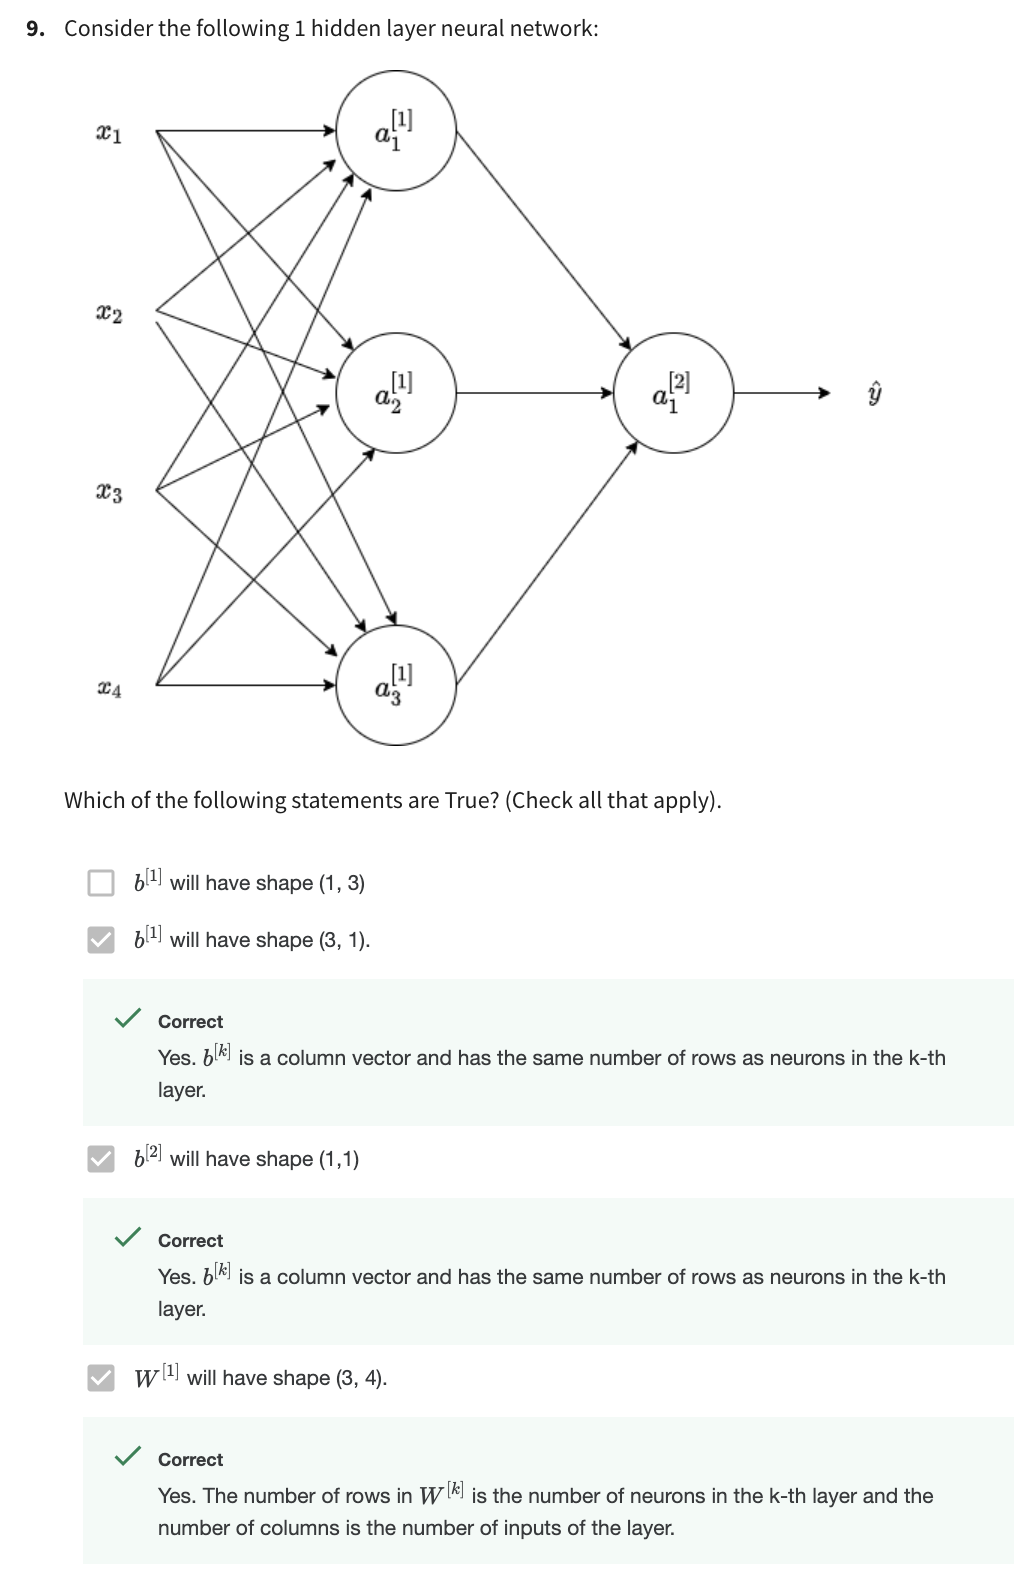

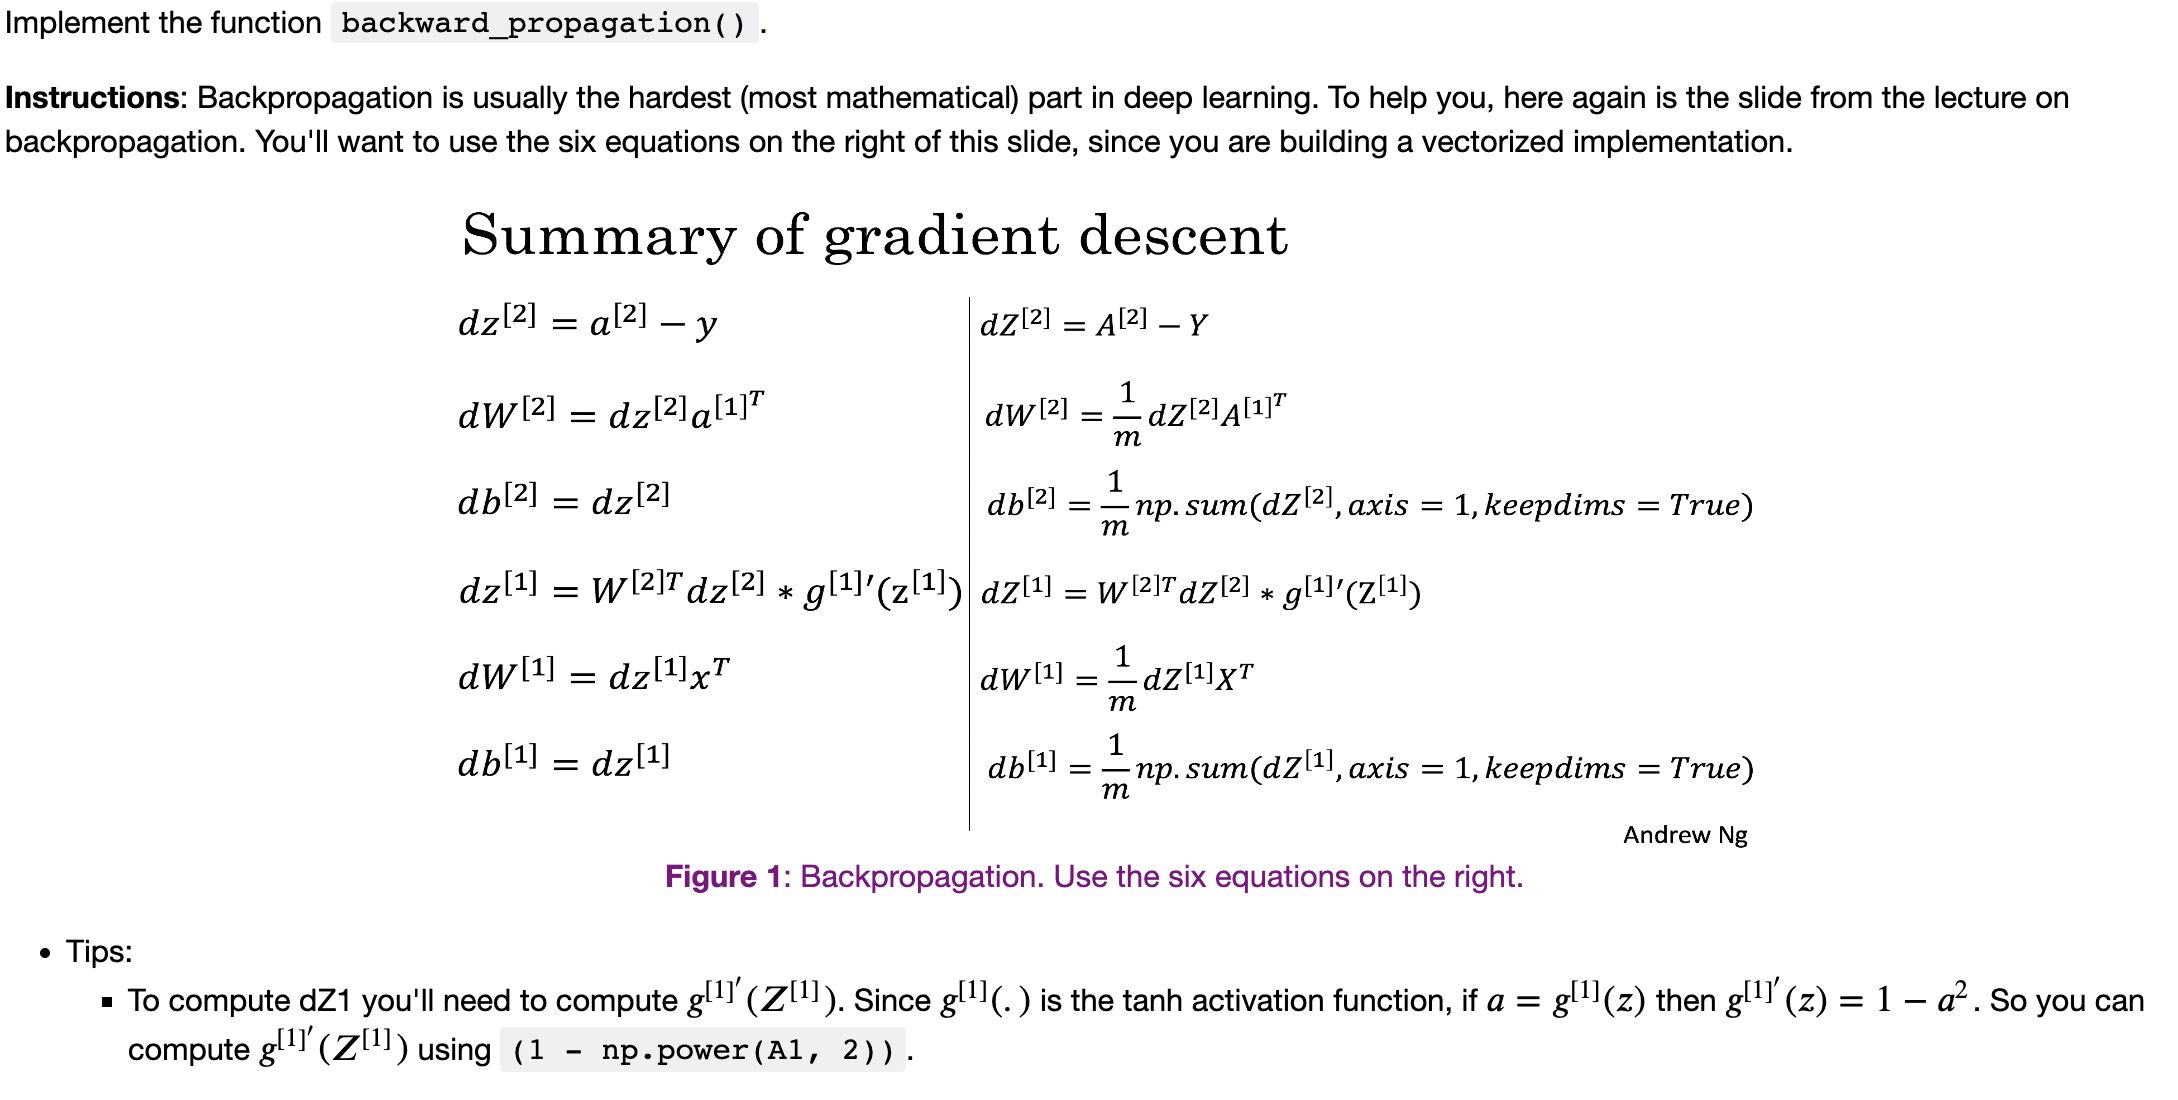
- For **backpropagation with regularization** you have to add the regularization term's gradient ($\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$).

- The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging)
- Use `copy.deepcopy(...)` when copying lists or dictionaries that are passed as parameters to functions. It avoids input parameters being modified within the function.

**General gradient descent rule**: $\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

**Hyperparameters**

- Parameters: 
    - $W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}, W^{[3]}, b^{[3]} ...$
- Hyperparameters: 
    - learning rate $\alpha$ 
    - number iterations
    - number hidden layers L
    - number hidden units $n^{[1]}, n^{[2]}...$
    - choice of activation function
    - momentum
    - minibatch size
    - regulations
    - $\lambda$ is a hyperparameter that you can tune using a dev set.
        - L2 regularization makes your decision boundary smoother. If $\lambda$ is too large, it is also possible to "oversmooth", resulting in a model with high bias.

    

<a name='3-2'></a>
### 3.2 - L-layer Neural Network

The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep` function, you should make sure that your dimensions match between each layer. Recall that $n^{[l]}$ is the number of units in layer $l$. For example, if the size of your input $X$ is $(12288, 209)$ (with $m=209$ examples) then:

<table style="width:100%">
    <tr>
        <td>  </td> 
        <td> <b>Shape of W</b> </td> 
        <td> <b>Shape of b</b>  </td> 
        <td> <b>Activation</b> </td>
        <td> <b>Shape of Activation</b> </td> 
    <tr>
    <tr>
        <td> <b>Layer 1</b> </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        <td> $(n^{[1]},209)$ </td> 
    <tr>
    <tr>
        <td> <b>Layer 2</b> </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>  
   <tr>
       <td> <b>Layer L-1</b> </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
   <tr>
   <tr>
       <td> <b>Layer L</b> </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>
</table>

Remember that when you compute $W X + b$ in python, it carries out broadcasting. For example, if: 

$$ W = \begin{bmatrix}
    w_{00}  & w_{01} & w_{02} \\
    w_{10}  & w_{11} & w_{12} \\
    w_{20}  & w_{21} & w_{22} 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    x_{00}  & x_{01} & x_{02} \\
    x_{10}  & x_{11} & x_{12} \\
    x_{20}  & x_{21} & x_{22} 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    b_0  \\
    b_1  \\
    b_2
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (w_{00}x_{00} + w_{01}x_{10} + w_{02}x_{20}) + b_0 & (w_{00}x_{01} + w_{01}x_{11} + w_{02}x_{21}) + b_0 & \cdots \\
    (w_{10}x_{00} + w_{11}x_{10} + w_{12}x_{20}) + b_1 & (w_{10}x_{01} + w_{11}x_{11} + w_{12}x_{21}) + b_1 & \cdots \\
    (w_{20}x_{00} + w_{21}x_{10} + w_{22}x_{20}) + b_2 &  (w_{20}x_{01} + w_{21}x_{11} + w_{22}x_{21}) + b_2 & \cdots
\end{bmatrix}\tag{3}  $$


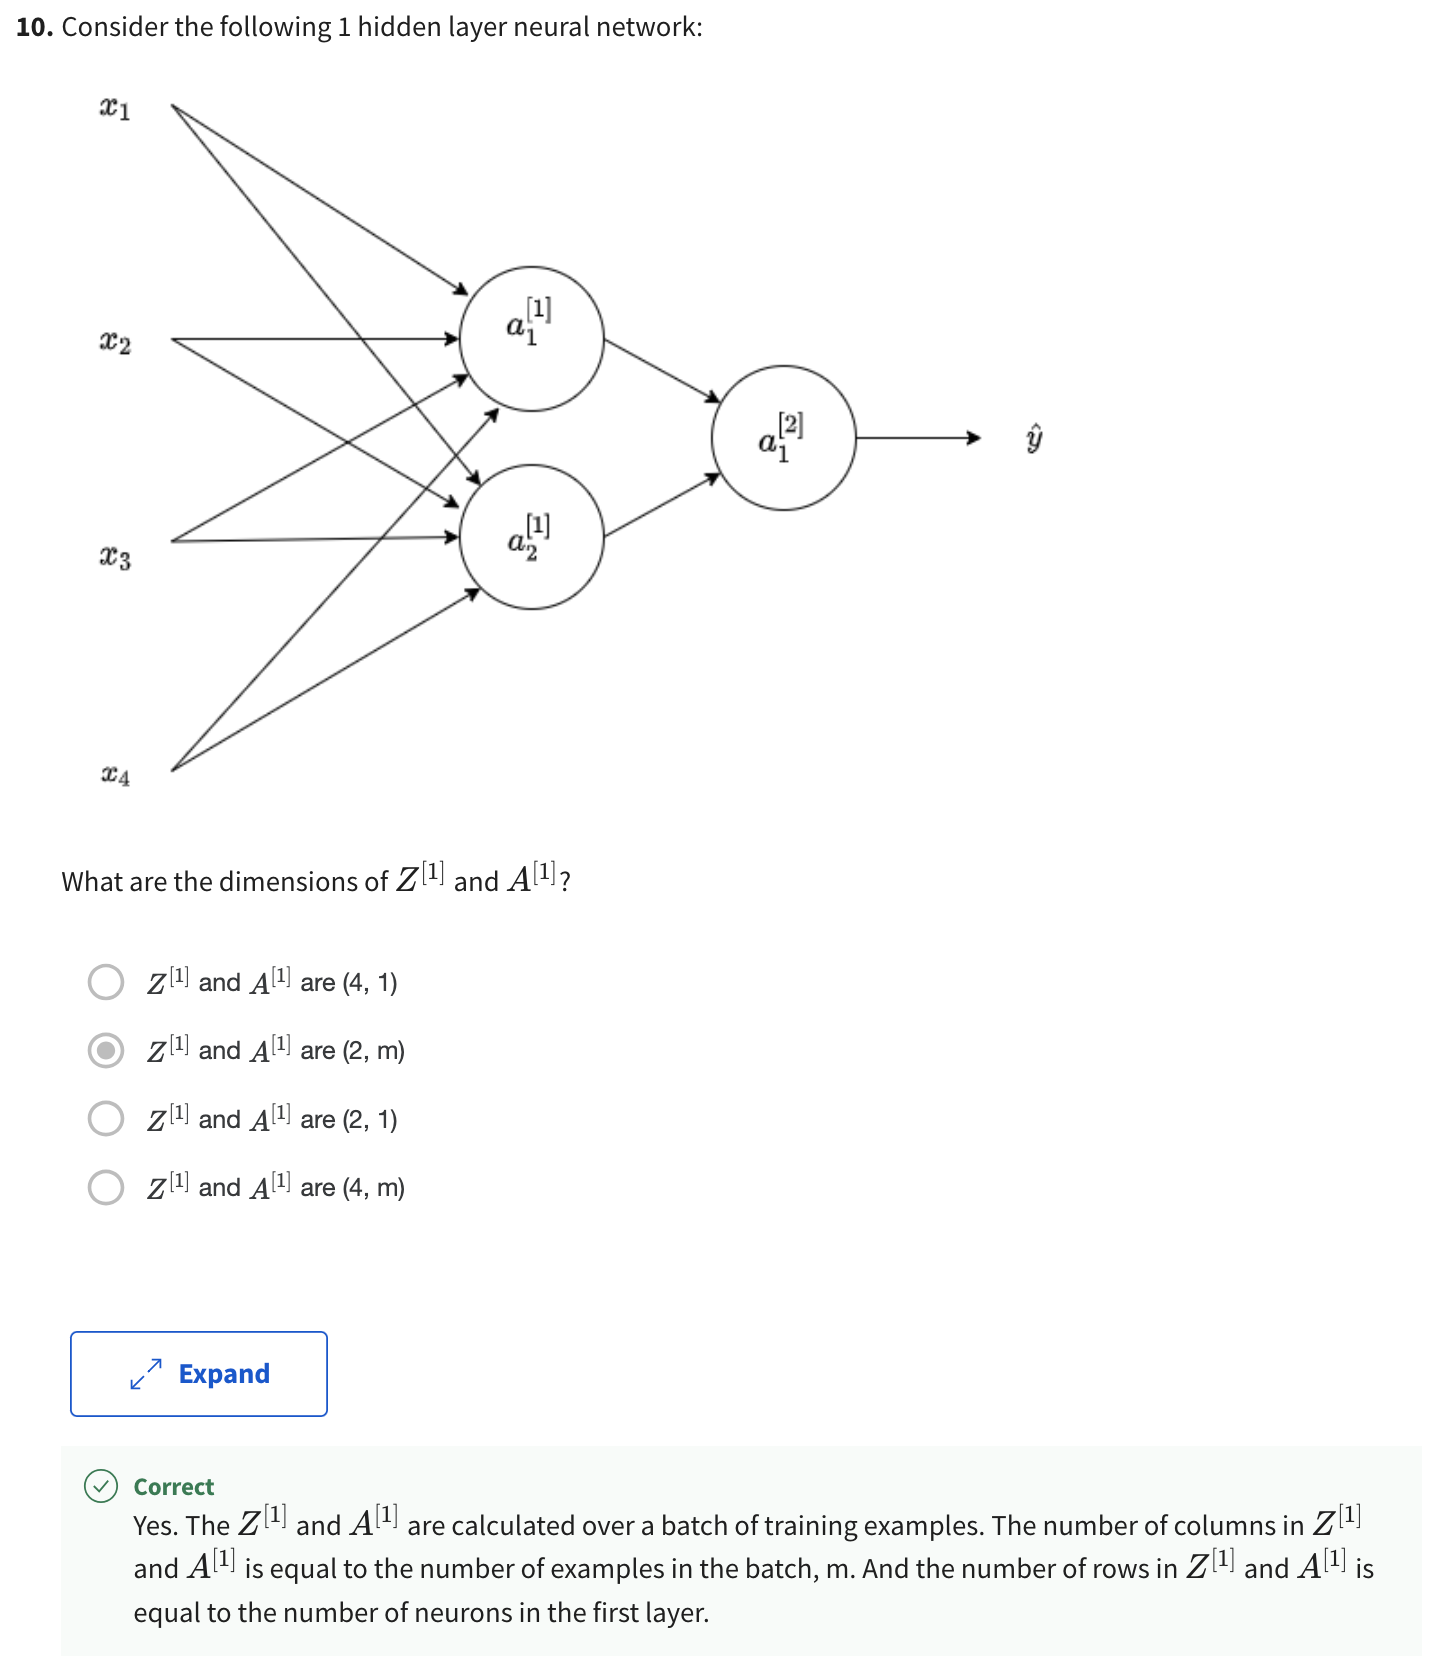

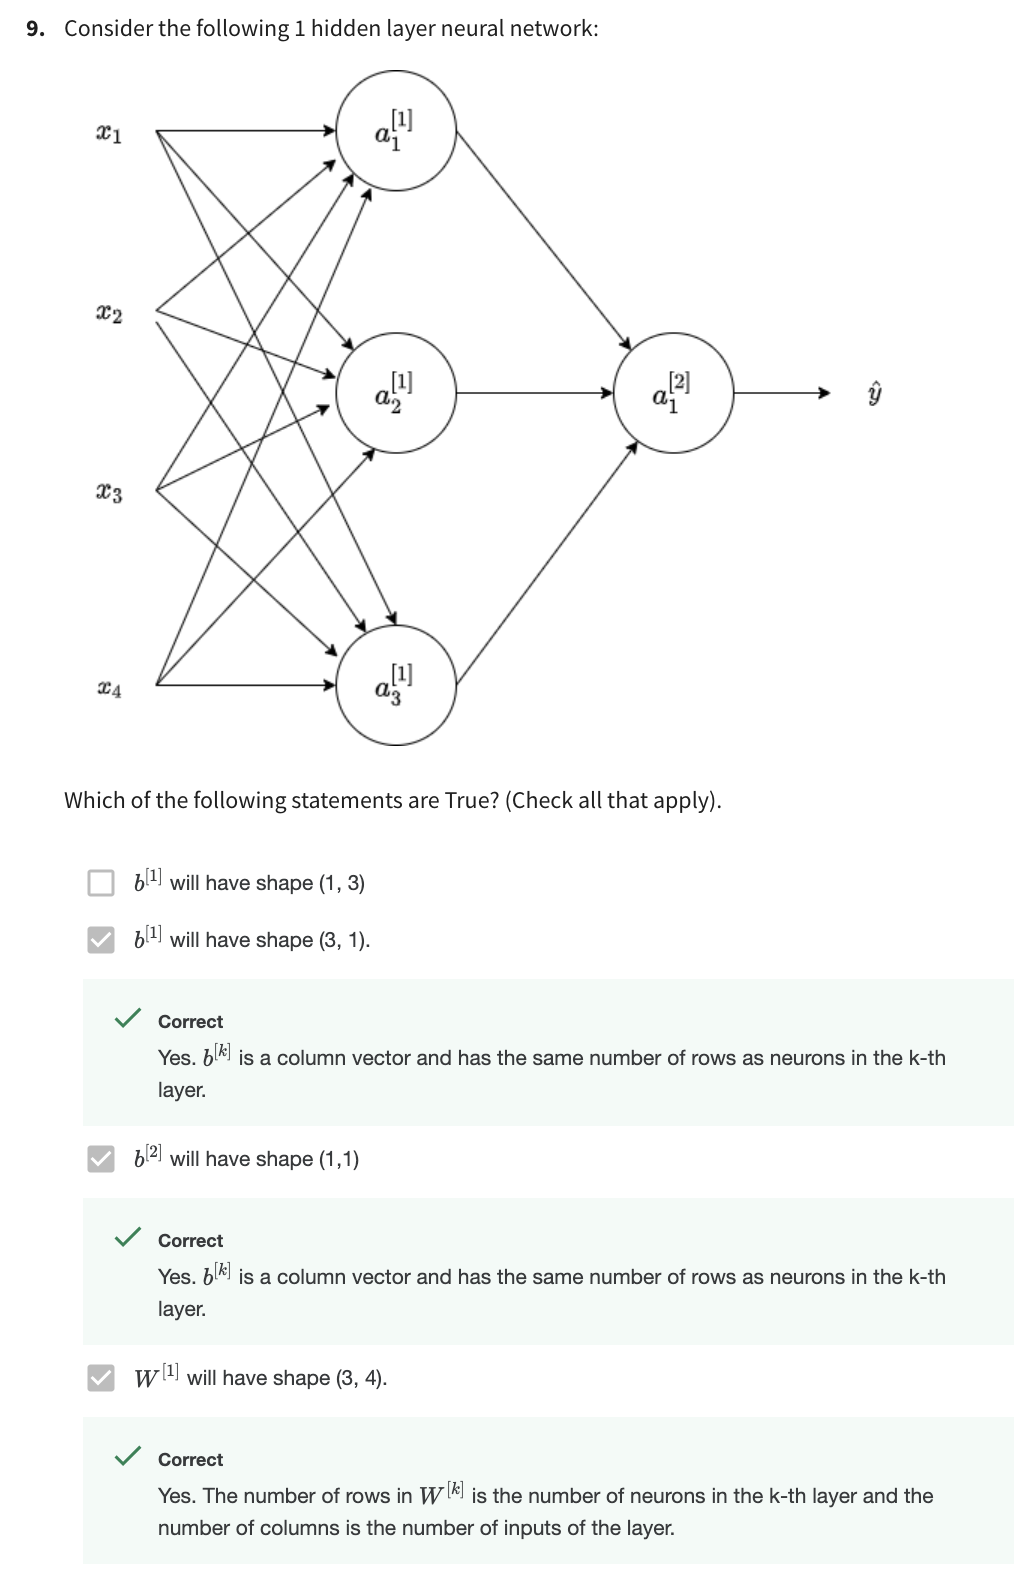

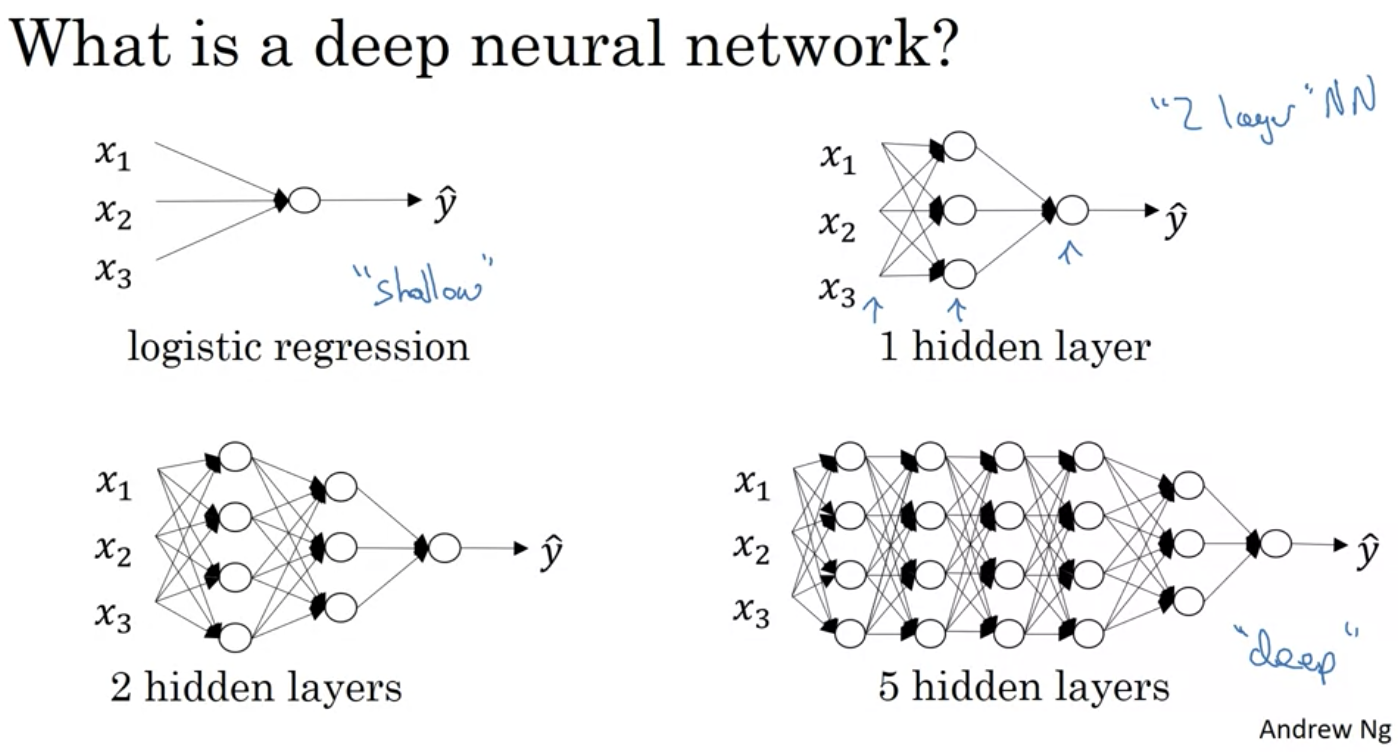

n = hidding units

m = training examples

1. Hypothesis tesing and A|B testing
    - Two possible hypothesis 
    1. Null 